<img src="https://www.bbva.com/wp-content/uploads/2019/11/machine-learning-1024x629.jpg">

<h1>Machine Learning<span class="tocSkip"></span></h1>



# Import

## Libraries

In [1]:
import src.limpieza as lm
import pandas as pd
import numpy as np
import pickle
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

## Machine learning libraries

In [2]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

## Dataframe

In [3]:
data = pd.read_csv("data/Machine_learning/casas_train_or.csv")
data.dtypes

Unnamed: 0                int64
sq_mt_built             float64
sq_mt_useful            float64
n_rooms                   int64
n_bathrooms             float64
floor                   float64
is_new_development        int64
is_renewal_needed         int64
has_parking               int64
is_exterior               int64
tipo                    float64
is_orientation_north      int64
is_orientation_west       int64
is_orientation_south      int64
is_orientation_east       int64
barrio_pm2              float64
e_certificate             int64
rent_price                int64
buy_price                 int64
dtype: object

In [4]:
#data["m2_x_pm2"] = data.sq_mt_built * data.barrio_pm2 * data.rent_price 
#data = data.drop(["sq_mt_built","barrio_pm2", "rent_price"], axis =1)

In [5]:
casas = data.drop("Unnamed: 0",axis=1)

# Correlated columns

In [6]:
casas.head()

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,floor,is_new_development,is_renewal_needed,has_parking,is_exterior,tipo,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,barrio_pm2,e_certificate,rent_price,buy_price
0,135.0,127.00,4,2.0,1.0,0,1,0,1,0.0,0,0,0,1,2.31944,0,1346,360000
1,231.0,196.35,4,3.0,3.0,0,1,0,1,0.0,0,0,0,1,4.80769,0,2509,939900
2,47.0,39.95,1,1.0,3.0,0,0,0,1,0.0,0,0,0,1,2.91533,0,791,163000
3,63.0,53.55,3,1.0,3.0,0,0,0,1,0.0,0,0,0,1,2.68693,0,979,220000
4,75.0,63.75,2,2.0,4.0,0,0,0,1,1.0,0,1,0,1,4.44830,0,1322,349900


<AxesSubplot:>

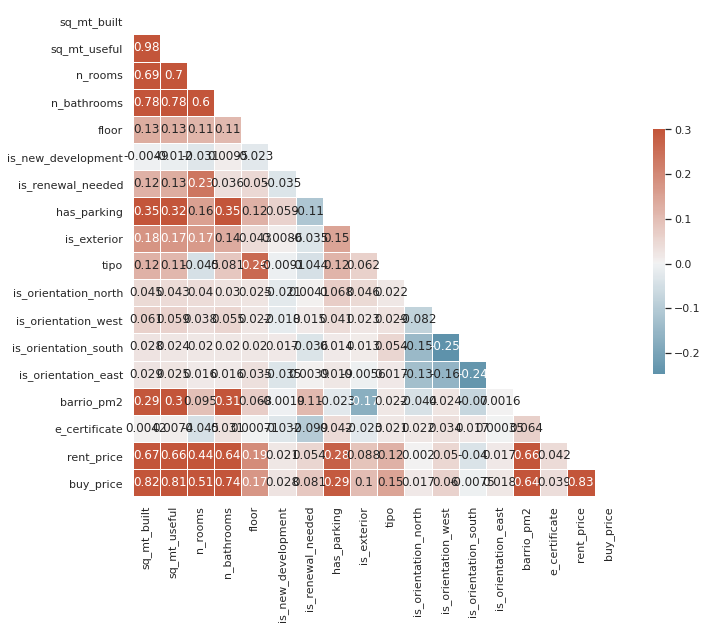

In [7]:
lm.heat_map_triangle(casas)

As I predicted in the cleaning jupyter, the columns useful square meters and built square meters are highly correlated so we must remove one of the two.

In [8]:
casas2 = casas.drop(["sq_mt_useful"], axis=1)

<AxesSubplot:>

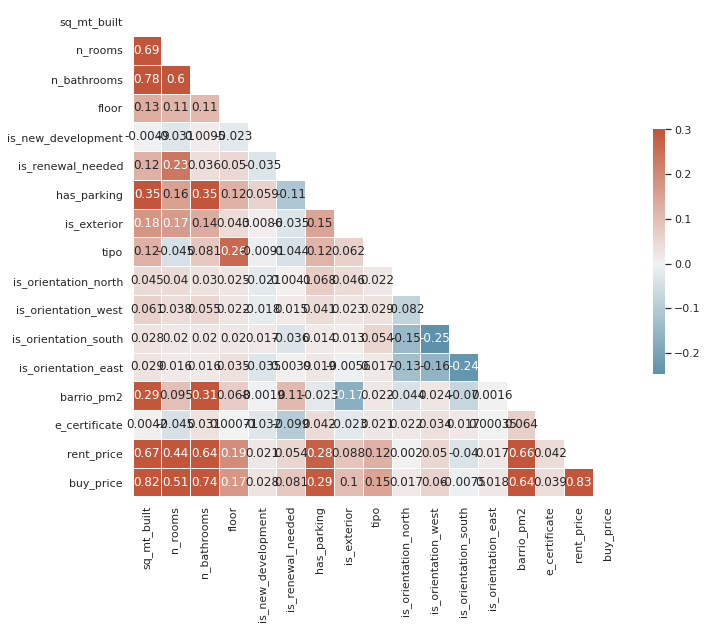

In [9]:
lm.heat_map_triangle(casas2)

In [10]:
casas2

,sq_mt_built,n_rooms,n_bathrooms,floor,is_new_development,is_renewal_needed,has_parking,is_exterior,tipo,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,barrio_pm2,e_certificate,rent_price,buy_price
0,135.0,4,2.0,1.0,0,1,0,1,0.0,0,0,0,1,2.31944,0,1346,360000
1,231.0,4,3.0,3.0,0,1,0,1,0.0,0,0,0,1,4.80769,0,2509,939900
2,47.0,1,1.0,3.0,0,0,0,1,0.0,0,0,0,1,2.91533,0,791,163000
3,63.0,3,1.0,3.0,0,0,0,1,0.0,0,0,0,1,2.68693,0,979,220000
4,75.0,2,2.0,4.0,0,0,0,1,1.0,0,1,0,1,4.44830,0,1322,349900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7843,91.0,3,2.0,3.0,0,0,0,1,0.0,0,1,1,0,4.10512,0,1621,480000
7844,130.0,3,2.0,4.0,0,0,1,1,0.0,1,0,0,0,3.97260,0,1701,515000
7845,213.0,4,2.0,3.0,0,0,0,1,0.0,0,0,0,1,4.80769,0,2514,950000
7846,168.0,4,3.0,1.0,0,1,0,1,0.0,0,0,1,1,5.88764,0,2103,690000


# Best columns

In [11]:
results = smf.ols("buy_price ~ sq_mt_built + rent_price + barrio_pm2 + n_rooms + n_bathrooms + floor + is_new_development + is_renewal_needed + has_parking + is_exterior + tipo + e_certificate  + is_orientation_west + is_orientation_south ", data = casas2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     3988.
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        13:26:34   Log-Likelihood:            -1.0155e+05
No. Observations:                7848   AIC:                         2.031e+05
Df Residuals:                    7833   BIC:                         2.032e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -3.479e+05   6287.109    -55.336      0.000    -3.6e+05   -3.36e+05
sq_mt_built           2605.5834     39.960     65.204      0.000    2527.251    2683.916
rent_price             100.0837      3.785     26.444      0.000      92.665     107.503
barrio_pm2             7.05e+04   1297.180     54.348      0.000     6.8e+04     7.3e+04
n_rooms              -1.119e+04   1541.927     -7.255      0.000   -1.42e+04   -8164.018
n_bathrooms           4.375e+04   2415.389     18.115      0.000     3.9e+04    4.85e+04
floor                 4001.4119    584.644      6.844      0.000    2855.354    5147.470
is_new_development    9.788e+04   1.67e+04      5.856      0.000    6.51e+04    1.31e+05
is_renewal_needed    -1.333e+04   3001.937     -4.441      0.000   -1.92e+04   -7447.685
has_parking           5323.6370   2771.531      1.921      0.055    -109.303    1.08e+04
is_exterior           3.599e+04   4223.320      8.522      0.000    2.77e+04    4.43e+04
tipo                   1.74e+04   2486.651      6.997      0.000    1.25e+04    2.23e+04
e_certificate           -6.1188    607.175     -0.010      0.992   -1196.344    1184.107
is_orientation_west   3220.0987   2492.068      1.292      0.196   -1665.020    8105.217
is_orientation_south  2987.5731   2373.649      1.259      0.208   -1665.412    7640.558
==============================================================================
Omnibus:                     2944.555   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32297.703
Skew:                           1.482   Prob(JB):                         0.00
Kurtosis:                      12.486   Cond. No.                     2.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
col3 = ['sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor', 'is_new_development', 'is_renewal_needed','has_parking', 'is_exterior', 'tipo','barrio_pm2', 'e_certificate', "buy_price"]

# Train-Test-Split

In [13]:
modelo = casas2

In [14]:
X = modelo.drop("buy_price", axis=1)
y = modelo.buy_price

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
X_train.shape

(6278, 16)

In [17]:
X_test.shape

(1570, 16)

In [18]:
y_train.shape

(6278,)

In [19]:
y_test.shape

(1570,)

In [20]:
X_test.head()

,sq_mt_built,n_rooms,n_bathrooms,floor,is_new_development,is_renewal_needed,has_parking,is_exterior,tipo,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,barrio_pm2,e_certificate,rent_price
2395,95.0,2,2.0,4.0,0,0,1,1,0.0,0,0,1,1,3.97260,0,1571
1764,95.0,2,1.0,1.0,0,0,0,1,0.0,0,1,0,0,5.00000,0,1576
6313,99.0,3,2.0,8.0,0,1,0,1,0.0,0,0,1,1,4.24658,0,1428
6291,219.0,6,3.0,1.0,0,1,0,1,0.0,0,0,0,1,6.56427,0,2514
6065,61.0,3,1.0,4.0,0,1,0,1,0.0,0,0,1,0,3.15253,0,961


# Train models

In [21]:
models = {"ridge":Ridge(),
         "lasso":Lasso(),
         "sgd":SGDRegressor(),
         "KNN":KNeighborsRegressor(),
         "gradient":GradientBoostingRegressor(),
          "Rfr" : RandomForestRegressor(),
          "Decision Tree" : DecisionTreeRegressor(max_depth=7),
          #"XGBoost" : XGBRegressor(),
          
         }

In [22]:

dicc= {}

for name, model in models.items():
    dicc_metrics = {}
    
    print(f"Trainning model -----> {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    dicc_metrics["MAE"] = metrics.mean_absolute_error(y_test, y_pred)
    dicc_metrics["MSE"] = metrics.mean_squared_error(y_test,y_pred)
    dicc_metrics["RMSE"] = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    dicc_metrics["R2_score"] = metrics.r2_score(y_true=y_test,y_pred=y_pred)
    
    dicc[name] = dicc_metrics
    
    print("Model finished")
metricas = pd.DataFrame(dicc)
metricas

Trainning model -----> ridge
Model finished
Trainning model -----> lasso
Model finished
Trainning model -----> sgd
Model finished
Trainning model -----> KNN
Model finished
Trainning model -----> gradient
Model finished
Trainning model -----> Rfr
Model finished
Trainning model -----> Decision Tree
Model finished


,ridge,lasso,sgd,KNN,gradient,Rfr,Decision Tree
MAE,6.334808e+04,6.335304e+04,1.437088e+14,1.498030e+04,2.051956e+04,8.757349e+03,1.634336e+04
MSE,1.007445e+10,1.007548e+10,2.422072e+28,5.565171e+09,3.152144e+09,3.091973e+09,3.870323e+09
RMSE,1.003716e+05,1.003767e+05,1.556301e+14,7.460007e+04,5.614396e+04,5.560551e+04,6.221192e+04
R2_score,8.765194e-01,8.765068e-01,-2.968686e+17,9.317888e-01,9.613648e-01,9.621023e-01,9.525622e-01


Best models to predict the diamond price are **###** and **###** 

# Max depth

In [23]:
results = []

for depth in range(1, 25):
    model = RandomForestRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    result = {
        "depth": depth,
        "train_error": metrics.mean_squared_error(y_train, model.predict(X_train)),
        "test_error": metrics.mean_squared_error(y_test, model.predict(X_test))
    }
    
    results.append(result)

In [24]:
results_df = pd.DataFrame(results)

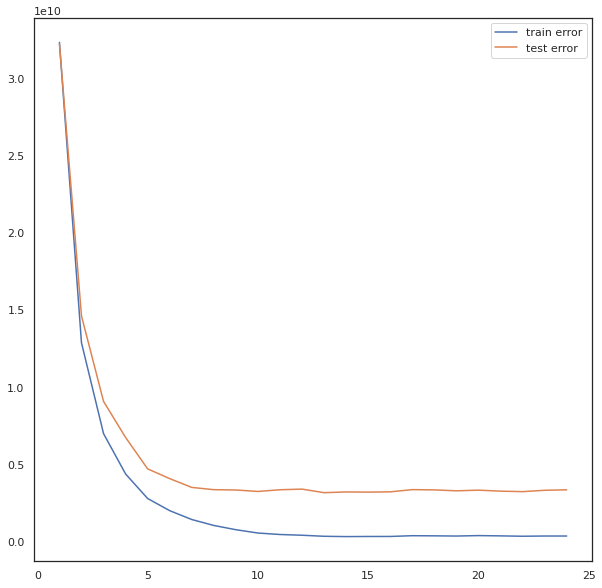

In [25]:
fig = plt.figure(figsize=(10, 10))
plt.plot(results_df.depth, results_df.train_error, label="train error")
plt.plot(results_df.depth, results_df.test_error, label="test error")
plt.legend()

# Parameter Tuning
Now that we have found the most efficient model, let's try the different `hyperparameters` to improve it.



In [26]:
gs = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        "max_depth": [6,7,8,9],
        "max_features": [0.5,0.65,.75,0.8,.9,1],
        "min_samples_split": [2,3,5]
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

In [27]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END max_depth=6, max_features=0.5, min_samples_split=2; total time=   0.4s
[CV 2/5] END max_depth=6, max_features=0.5, min_samples_split=2; total time=   0.4s
[CV 3/5] END max_depth=6, max_features=0.5, min_samples_split=2; total time=   0.4s
[CV 4/5] END max_depth=6, max_features=0.5, min_samples_split=2; total time=   0.4s
[CV 5/5] END max_depth=6, max_features=0.5, min_samples_split=2; total time=   0.4s
[CV 1/5] END max_depth=6, max_features=0.5, min_samples_split=3; total time=   0.4s
[CV 2/5] END max_depth=6, max_features=0.5, min_samples_split=3; total time=   0.4s
[CV 3/5] END max_depth=6, max_features=0.5, min_samples_split=3; total time=   0.4s
[CV 4/5] END max_depth=6, max_features=0.5, min_samples_split=3; total time=   0.4s
[CV 5/5] END max_depth=6, max_features=0.5, min_samples_split=3; total time=   0.4s
[CV 1/5] END max_depth=6, max_features=0.5, min_samples_split=5; total time=   0.4s
[CV 2/5] END m

[CV 3/5] END max_depth=7, max_features=0.5, min_samples_split=3; total time=   0.4s
[CV 4/5] END max_depth=7, max_features=0.5, min_samples_split=3; total time=   0.4s
[CV 5/5] END max_depth=7, max_features=0.5, min_samples_split=3; total time=   0.4s
[CV 1/5] END max_depth=7, max_features=0.5, min_samples_split=5; total time=   0.4s
[CV 2/5] END max_depth=7, max_features=0.5, min_samples_split=5; total time=   0.4s
[CV 3/5] END max_depth=7, max_features=0.5, min_samples_split=5; total time=   0.4s
[CV 4/5] END max_depth=7, max_features=0.5, min_samples_split=5; total time=   0.4s
[CV 5/5] END max_depth=7, max_features=0.5, min_samples_split=5; total time=   0.4s
[CV 1/5] END max_depth=7, max_features=0.65, min_samples_split=2; total time=   0.5s
[CV 2/5] END max_depth=7, max_features=0.65, min_samples_split=2; total time=   0.5s
[CV 3/5] END max_depth=7, max_features=0.65, min_samples_split=2; total time=   0.5s
[CV 4/5] END max_depth=7, max_features=0.65, min_samples_split=2; total t

[CV 1/5] END max_depth=8, max_features=0.65, min_samples_split=2; total time=   0.5s
[CV 2/5] END max_depth=8, max_features=0.65, min_samples_split=2; total time=   0.5s
[CV 3/5] END max_depth=8, max_features=0.65, min_samples_split=2; total time=   0.5s
[CV 4/5] END max_depth=8, max_features=0.65, min_samples_split=2; total time=   0.6s
[CV 5/5] END max_depth=8, max_features=0.65, min_samples_split=2; total time=   0.6s
[CV 1/5] END max_depth=8, max_features=0.65, min_samples_split=3; total time=   0.6s
[CV 2/5] END max_depth=8, max_features=0.65, min_samples_split=3; total time=   0.6s
[CV 3/5] END max_depth=8, max_features=0.65, min_samples_split=3; total time=   0.6s
[CV 4/5] END max_depth=8, max_features=0.65, min_samples_split=3; total time=   0.6s
[CV 5/5] END max_depth=8, max_features=0.65, min_samples_split=3; total time=   0.6s
[CV 1/5] END max_depth=8, max_features=0.65, min_samples_split=5; total time=   0.6s
[CV 2/5] END max_depth=8, max_features=0.65, min_samples_split=5;

[CV 4/5] END max_depth=9, max_features=0.65, min_samples_split=3; total time=   0.6s
[CV 5/5] END max_depth=9, max_features=0.65, min_samples_split=3; total time=   0.6s
[CV 1/5] END max_depth=9, max_features=0.65, min_samples_split=5; total time=   0.6s
[CV 2/5] END max_depth=9, max_features=0.65, min_samples_split=5; total time=   0.6s
[CV 3/5] END max_depth=9, max_features=0.65, min_samples_split=5; total time=   0.6s
[CV 4/5] END max_depth=9, max_features=0.65, min_samples_split=5; total time=   0.6s
[CV 5/5] END max_depth=9, max_features=0.65, min_samples_split=5; total time=   0.6s
[CV 1/5] END max_depth=9, max_features=0.75, min_samples_split=2; total time=   0.7s
[CV 2/5] END max_depth=9, max_features=0.75, min_samples_split=2; total time=   0.7s
[CV 3/5] END max_depth=9, max_features=0.75, min_samples_split=2; total time=   0.7s
[CV 4/5] END max_depth=9, max_features=0.75, min_samples_split=2; total time=   0.7s
[CV 5/5] END max_depth=9, max_features=0.75, min_samples_split=2;

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6, 7, 8, 9],
                         'max_features': [0.5, 0.65, 0.75, 0.8, 0.9, 1],
                         'min_samples_split': [2, 3, 5]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [28]:
grid_search_results = pd.DataFrame(gs.cv_results_)
# we only keep some of the information
grid_search_results = grid_search_results[['param_max_depth', 'param_max_features', 'param_min_samples_split',
       'mean_test_score', 'mean_train_score']]
grid_search_results["diferencia"] = grid_search_results["mean_test_score"] - grid_search_results["mean_train_score"]

In [29]:
grid_search_results.sort_values("mean_test_score", ascending=False).head(10)

,param_max_depth,param_max_features,param_min_samples_split,mean_test_score,mean_train_score,diferencia
60,9,0.75,2,-2.639939e+09,-6.946820e+08,-1.945257e+09
63,9,0.8,2,-2.673330e+09,-7.015201e+08,-1.971810e+09
57,9,0.65,2,-2.684435e+09,-7.668106e+08,-1.917624e+09
64,9,0.8,3,-2.688298e+09,-7.518668e+08,-1.936431e+09
61,9,0.75,3,-2.709949e+09,-7.383815e+08,-1.971568e+09
62,9,0.75,5,-2.710027e+09,-8.458087e+08,-1.864218e+09
59,9,0.65,5,-2.756672e+09,-9.006105e+08,-1.856061e+09
58,9,0.65,3,-2.769494e+09,-7.987647e+08,-1.970729e+09
68,9,0.9,5,-2.782084e+09,-8.213559e+08,-1.960728e+09
65,9,0.8,5,-2.802568e+09,-8.491358e+08,-1.953432e+09


In [30]:
best_tree = gs.best_estimator_

# Test model
Once we have our model, its time to test it.

In [31]:
best_tree.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features=0.75)

In [32]:
metrics.mean_squared_error(best_tree.predict(X_test),y_test)

2692638513.1580486

In [33]:
np.sqrt(metrics.mean_squared_error(best_tree.predict(X_test),y_test)).round(5)

51890.63994

In [34]:
casas.head()

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,floor,is_new_development,is_renewal_needed,has_parking,is_exterior,tipo,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,barrio_pm2,e_certificate,rent_price,buy_price
0,135.0,127.00,4,2.0,1.0,0,1,0,1,0.0,0,0,0,1,2.31944,0,1346,360000
1,231.0,196.35,4,3.0,3.0,0,1,0,1,0.0,0,0,0,1,4.80769,0,2509,939900
2,47.0,39.95,1,1.0,3.0,0,0,0,1,0.0,0,0,0,1,2.91533,0,791,163000
3,63.0,53.55,3,1.0,3.0,0,0,0,1,0.0,0,0,0,1,2.68693,0,979,220000
4,75.0,63.75,2,2.0,4.0,0,0,0,1,1.0,0,1,0,1,4.44830,0,1322,349900


# Second Test
In the jupyter above we split the data in two, keeping 10% percent of the data to test with the final model, so that we have two tests, the original model and an extra one, as if they were new values.

In [35]:
prueba = pd.read_csv("data/Machine_learning/Test/casas_test_or.csv")

#prueba["m2_x_pm2"] = prueba.sq_mt_built * prueba.barrio_pm2 * prueba.rent_price 
#prueba = prueba.drop(["sq_mt_built","barrio_pm2", "rent_price"], axis =1)

prueba = prueba.drop("Unnamed: 0",axis=1)
prueba.head()

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,floor,is_new_development,is_renewal_needed,has_parking,is_exterior,tipo,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,barrio_pm2,e_certificate,rent_price,buy_price
0,90.0,76.5,3,2.0,3.0,0,0,0,1,0.0,0,1,0,0,2.57887,2,1067,250000
1,64.0,52.0,2,1.0,1.0,0,0,1,1,0.0,0,0,0,1,1.94138,0,948,210000
2,45.0,44.0,2,1.0,0.0,0,0,0,0,1.0,0,0,1,0,3.53607,0,777,159000
3,45.0,30.0,1,1.0,3.0,0,0,1,1,2.0,1,0,1,0,4.67753,0,1213,305000
4,120.0,89.0,2,2.0,0.0,0,0,0,1,0.0,1,1,0,0,4.36790,2,1802,559000


In [36]:
#prueba["m2_x_pm2"] = prueba["sq_mt_built"] * prueba["barrio_pm2"] *1000

In [37]:
prueba = prueba.drop(["sq_mt_useful"], axis=1)

In [38]:
prueba["predict"] = best_tree.predict(prueba.drop("buy_price", axis=1))
prueba.head()

,sq_mt_built,n_rooms,n_bathrooms,floor,is_new_development,is_renewal_needed,has_parking,is_exterior,tipo,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,barrio_pm2,e_certificate,rent_price,buy_price,predict
0,90.0,3,2.0,3.0,0,0,0,1,0.0,0,1,0,0,2.57887,2,1067,250000,251310.065824
1,64.0,2,1.0,1.0,0,0,1,1,0.0,0,0,0,1,1.94138,0,948,210000,210767.285701
2,45.0,2,1.0,0.0,0,0,0,0,1.0,0,0,1,0,3.53607,0,777,159000,158681.278470
3,45.0,1,1.0,3.0,0,0,1,1,2.0,1,0,1,0,4.67753,0,1213,305000,303315.985297
4,120.0,2,2.0,0.0,0,0,0,1,0.0,1,1,0,0,4.36790,2,1802,559000,554740.508852


In [39]:
np.sqrt(metrics.mean_squared_error(prueba.buy_price,prueba["predict"]))

57748.31212151825

In [40]:
metrics.r2_score(y_true=y_test,y_pred=y_pred)

0.9525622032004851

In [41]:
prueba["diferencia"] = round(np.sqrt((prueba["buy_price"] - prueba["predict"])**2),2)

In [42]:
prueba.sort_values("diferencia", ascending=False).head(100)

,sq_mt_built,n_rooms,n_bathrooms,floor,is_new_development,is_renewal_needed,has_parking,is_exterior,tipo,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,barrio_pm2,e_certificate,rent_price,buy_price,predict,diferencia
522,172.0,2,2.0,1.0,0,0,0,1,0.0,0,0,1,1,4.80769,0,1165,1290000,412525.041003,877474.96
778,161.0,4,3.0,6.0,0,0,1,1,2.0,0,1,0,1,5.00000,0,452,1350000,658069.161980,691930.84
825,170.0,4,2.0,5.0,0,0,0,1,2.0,0,0,1,0,4.80769,0,1960,1190000,652662.176691,537337.82
675,225.0,5,4.0,2.0,0,0,1,1,0.0,0,0,1,0,3.60040,0,2044,1175000,767577.515369,407422.48
104,237.0,5,4.0,2.0,0,0,1,1,0.0,0,0,1,0,3.60040,3,2044,1175000,796771.438498,378228.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,166.0,5,2.0,1.0,0,0,1,1,0.0,1,0,1,0,3.50000,0,1941,619000,645725.057912,26725.06
850,150.0,3,3.0,4.0,0,0,1,1,1.0,0,0,1,0,4.27546,0,2170,720000,746563.442353,26563.44
488,150.0,3,3.0,4.0,0,0,1,1,1.0,0,0,1,0,4.27546,0,2170,720000,746563.442353,26563.44
84,229.0,4,2.0,8.0,0,0,0,1,0.0,1,1,0,1,3.50000,4,2159,715000,741005.417521,26005.42


In [43]:
prueba.shape

(873, 19)

# Market test

In [ ]:
market = {
    "sq_mt_built":
    "n_rooms":
    "n_bathrooms" : 
    "floor" : 
    "is_new_development" : 
    "is_renewal_needed" : 
    "has_parking": 
    "is_exterior" : 
    
}